# AAS - Timeseries Demo

This demo is not exhaustive. See the full tutorial at https://aas-timeseries.readthedocs.io/en/latest/index.html

### Create sample timeseries

In [1]:
from astropy import units as u
from astropy.timeseries import TimeSeries
ts = TimeSeries(time_start='2016-03-22T12:30:31', time_delta=3 * u.s, n_samples=10)
ts['flux'] = [10, 11, 9, 10, 2, 3, 5, 12, 11, 10]
ts['error'] = [2, 2.5, 2, 1.5, 2, 2, 1.5, 1.5, 2., 2.5]

In [2]:
ts[:5]

time,flux,error
object,int64,float64
2016-03-22T12:30:31.000,10,2.0
2016-03-22T12:30:34.000,11,2.5
2016-03-22T12:30:37.000,9,2.0
2016-03-22T12:30:40.000,10,1.5
2016-03-22T12:30:43.000,2,2.0


### Initialize figure

In [3]:
from aas_timeseries import InteractiveTimeSeriesFigure
fig = InteractiveTimeSeriesFigure()

### Add markers, axes labels

In [4]:
markers = fig.add_markers(time_series=ts, column='flux', label='Flux')

In [5]:
fig.xlabel = 'Time (UTC)'
fig.ylabel = 'Flux (electron/s)'

In [6]:
fig.preview_interactive()

TimeSeriesWidget(vega_json='{\n  "$schema": "https://vega.github.io/schema/vega/v4.json",\n  "_extend": {\n   …

### Customize markers

In [7]:
markers.size = 50
markers.color = "red"
fig.preview_interactive()

TimeSeriesWidget(vega_json='{\n  "$schema": "https://vega.github.io/schema/vega/v4.json",\n  "_extend": {\n   …

### Add error bars

In [8]:
markers.error = "error" # column name
fig.preview_interactive()

TimeSeriesWidget(vega_json='{\n  "$schema": "https://vega.github.io/schema/vega/v4.json",\n  "_extend": {\n   …

### Add line

In [9]:
line = fig.add_line(time_series=ts, column='flux', label='Flux')
fig.preview_interactive()

TimeSeriesWidget(vega_json='{\n  "$schema": "https://vega.github.io/schema/vega/v4.json",\n  "_extend": {\n   …

### Customize line

In [10]:
line.width = 4
line.color = "blue"
fig.preview_interactive()


TimeSeriesWidget(vega_json='{\n  "$schema": "https://vega.github.io/schema/vega/v4.json",\n  "_extend": {\n   …

### Add vertical and horizontal lines

In [11]:
vertical_line = fig.add_vertical_line(ts.time[5], label='Special event')
horizontal_line = fig.add_horizontal_line(10, label='Baseline flux')
fig.preview_interactive() # these can be hidden in the options menu

TimeSeriesWidget(vega_json='{\n  "$schema": "https://vega.github.io/schema/vega/v4.json",\n  "_extend": {\n   …

### Add ranges

In [12]:
# calculate upper and lower flux values based on errors
ts['flux_lo'] = ts['flux'] - ts['error']
ts['flux_hi'] = ts['flux'] + ts['error']

frange = fig.add_range(time_series=ts, column_lower='flux_lo',
                       column_upper='flux_hi', label='Range')
fig.preview_interactive()

TimeSeriesWidget(vega_json='{\n  "$schema": "https://vega.github.io/schema/vega/v4.json",\n  "_extend": {\n   …

In [13]:
# vertical and horizontal ranges

vrange = fig.add_vertical_range(ts.time[4], ts.time[6], label='Vertical Range')
hrange = fig.add_horizontal_range(8, 11, label='Horizontal Range')

fig.preview_interactive()

TimeSeriesWidget(vega_json='{\n  "$schema": "https://vega.github.io/schema/vega/v4.json",\n  "_extend": {\n   …

### Add text labels

In [14]:
text = fig.add_text(time=ts.time[1], value=5, text='Here be dragons', label='Text')

fig.preview_interactive()

TimeSeriesWidget(vega_json='{\n  "$schema": "https://vega.github.io/schema/vega/v4.json",\n  "_extend": {\n   …

### Remove layers

In [15]:
text.remove()
vrange.remove()
hrange.remove()
vertical_line.remove()
horizontal_line.remove()

fig.preview_interactive()

TimeSeriesWidget(vega_json='{\n  "$schema": "https://vega.github.io/schema/vega/v4.json",\n  "_extend": {\n   …

### Adding a custom view

In [16]:
view1 = fig.add_view('Custom View')

view1.xlim = '2016-03-22T12:30:34.000', '2016-03-22T12:30:40.000'
view1.ylim = 6, 13

fig.preview_interactive() # swap to the custom view in the options menu

TimeSeriesWidget(vega_json='{\n  "$schema": "https://vega.github.io/schema/vega/v4.json",\n  "_extend": {\n   …

### Hiding layers in views

In [17]:
view1.hide(frange)
fig.preview_interactive() # can be re-enabled in options menu

TimeSeriesWidget(vega_json='{\n  "$schema": "https://vega.github.io/schema/vega/v4.json",\n  "_extend": {\n   …

### Saving the figure

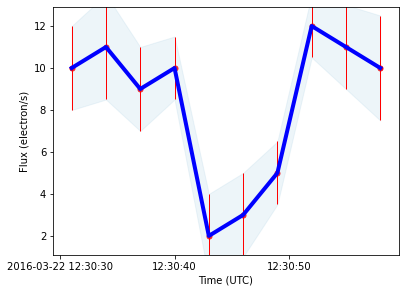

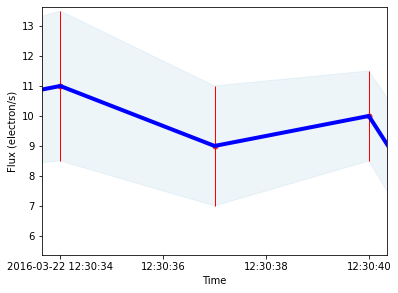

In [18]:
# interactive
fig.save_vega_json('my_figure.json')

# static
fig.save_static('my_figure', format='jpg') # saves all views in separate file